# Notebook Contents
1. Importing Libraries and Data
2. Subsetting, Wrangling, and Cleaning Data
3. Creating Line Chart
4. Time-series Analysis: Decomposition
5. Testing for Stationarity

# 1. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#Creating path
path =r'C:\Users\smflo\Documents\Gun Violence Analysis'

In [3]:
#Importing guns_clean_2.csv
df_guns = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','guns_clean_2.csv'), index_col = False)

# 2. Subsetting, Wrangling, and Cleaning Data

In [4]:
#Viewing first 5 rows
df_guns.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,mass_shooting
0,0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,1.0
1,1,1,460726,1/1/2013,California,Hawthorne,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,1.0
2,2,2,478855,1/1/2013,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,NaN
3,3,3,478925,1/5/2013,Colorado,Aurora,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",1,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,NaN
4,4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,NaN


In [5]:
#Resetting index so that I can use the "date" column as a filter
df_guns_2 = df_guns.groupby(by=['date']).sum().reset_index()

In [6]:
#Checking output
df_guns_2.head()

,date,Unnamed: 0.1,Unnamed: 0,incident_id,n_killed,n_injured,congressional_district,n_guns_involved,state_house_district,state_senate_district,mass_shooting
0,1/1/2013,3,3,1400686,2,10,66.0,4,118.0,48.0,2.0
1,1/1/2014,83268,83268,22043714,50,132,1622.0,217,10722.0,3923.0,1.0
2,1/1/2015,11179039,11179039,60938071,61,122,1723.0,228,10811.0,4176.0,1.0
3,1/1/2016,23386441,23386441,109499770,61,114,1834.0,261,10781.0,4181.0,0.0
4,1/1/2017,56308419,56308419,254660275,74,179,2752.0,437,15581.0,6572.0,3.0


In [7]:
#Selecting only the necessary columns and putting them in a list called columns
columns = ["date", "mass_shooting"]

In [8]:
#Creating subset
sub = df_guns_2[columns]

In [9]:
#Checking output
sub.head()

,date,mass_shooting
0,1/1/2013,2.0
1,1/1/2014,1.0
2,1/1/2015,1.0
3,1/1/2016,0.0
4,1/1/2017,3.0


In [10]:
#Checking shape
sub.shape

(1725, 2)

Since there was no forecasted data, all of the data from "date" and "mass_shooting" were selected.

In [11]:
#Setting the "date" column as the index
from datetime import datetime

sub['datetime'] = pd.to_datetime(sub['date']) #Creating a datetime column from "date"
sub = sub.set_index('datetime').asfreq('w') #Setting the datetime as the index of the dataframe with a weekly frequency
sub.drop(['date'], axis=1, inplace=True) #Dropping the "date" column.
sub.head()

,mass_shooting
datetime,
2013-01-06,NaN
2013-01-13,NaN
2013-01-20,NaN
2013-01-27,NaN
2013-02-03,1.0


In [12]:
#Filling in missing values
sub['mass_shooting'].fillna(0, inplace=True)

In [13]:
sub.sort_values(by='datetime', axis=0, inplace=True)

In [14]:
#Checking output
sub.head()

,mass_shooting
datetime,
2013-01-06,0.0
2013-01-13,0.0
2013-01-20,0.0
2013-01-27,0.0
2013-02-03,1.0


# 3. Creating Line Chart

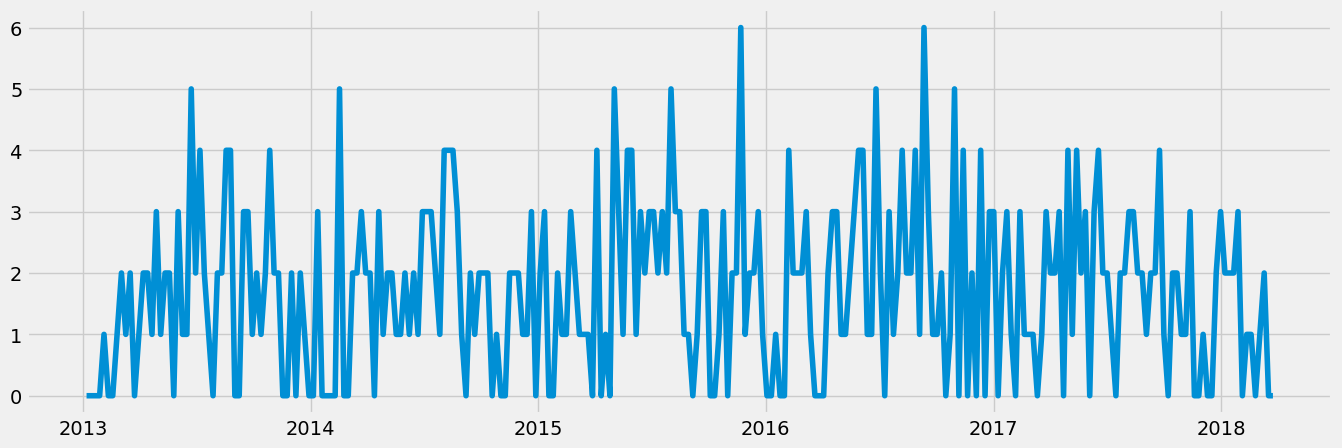

In [15]:
#Plotting the data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub)

In [16]:
#Smooting with moving average
sub['moving_average'] = sub['mass_shooting'].rolling(60).sum()

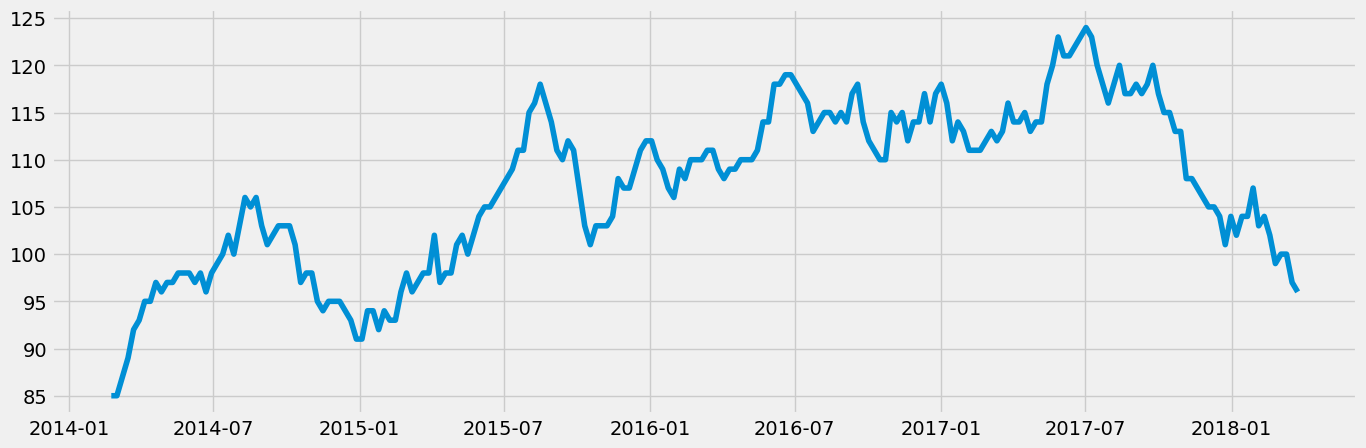

In [17]:
#Plotting the data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub['moving_average'])

In [18]:
sub.head()

,mass_shooting,moving_average
datetime,,
2013-01-06,0.0,NaN
2013-01-13,0.0,NaN
2013-01-20,0.0,NaN
2013-01-27,0.0,NaN
2013-02-03,1.0,NaN


In [19]:
#Deleting "moving_average" because of missing values
sub = sub.drop('moving_average', axis=1)

In [20]:
#Checking output
sub.head()

,mass_shooting
datetime,
2013-01-06,0.0
2013-01-13,0.0
2013-01-20,0.0
2013-01-27,0.0
2013-02-03,1.0


In [21]:
# Check for missing values 
sub.isnull().sum() 

mass_shooting    0
dtype: int64

# 4. Time-series Analysis: Decomposition

In [22]:
#Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(sub, model = 'additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

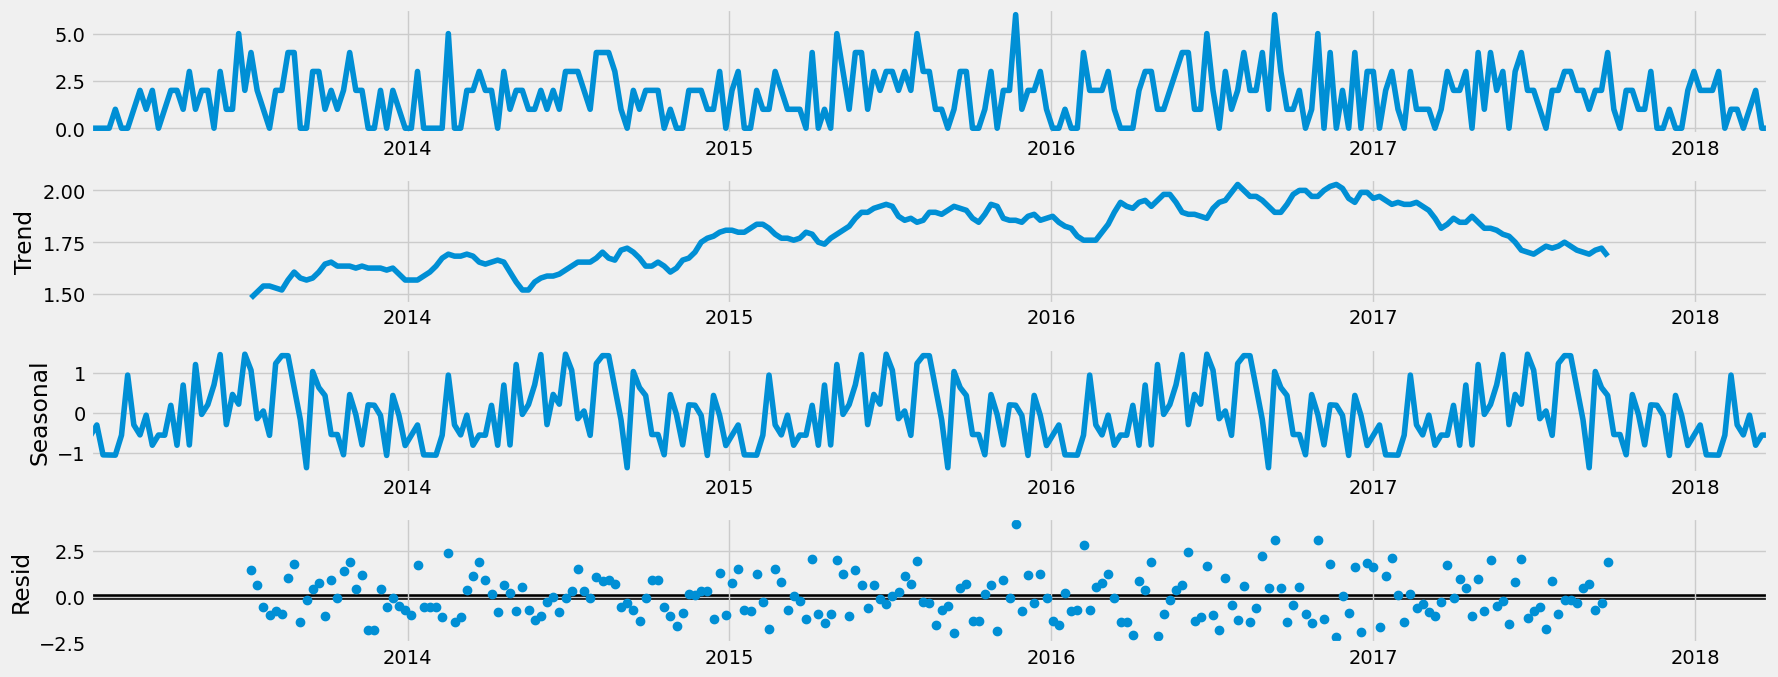

In [24]:
#Plotting the separate components
decomposition.plot()
plt.show()

There appears to be an increase in gun mass shootings between 2014 and 2017. After 2017, there is a slight decrease in mass shootings. As for seasonality, there appears to be an increase in mass shootings over the summer months. There also appears to be a good amount of residual/noise leftover.

# 5. Testing for Stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['mass_shooting'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.555141e+01
p-value                        2.097728e-28
Number of Lags Used            0.000000e+00
Number of Observations Used    2.720000e+02
Critical Value (1%)           -3.454622e+00
Critical Value (5%)           -2.872225e+00
Critical Value (10%)          -2.572464e+00
dtype: float64


The test statistic is -15.55. This is smaller than all three critical values. The test statistic is smaller than critical value so I can reject null hypothesis. There is not unit root in the data and it is stationary. The p-value is also below 0.05. 

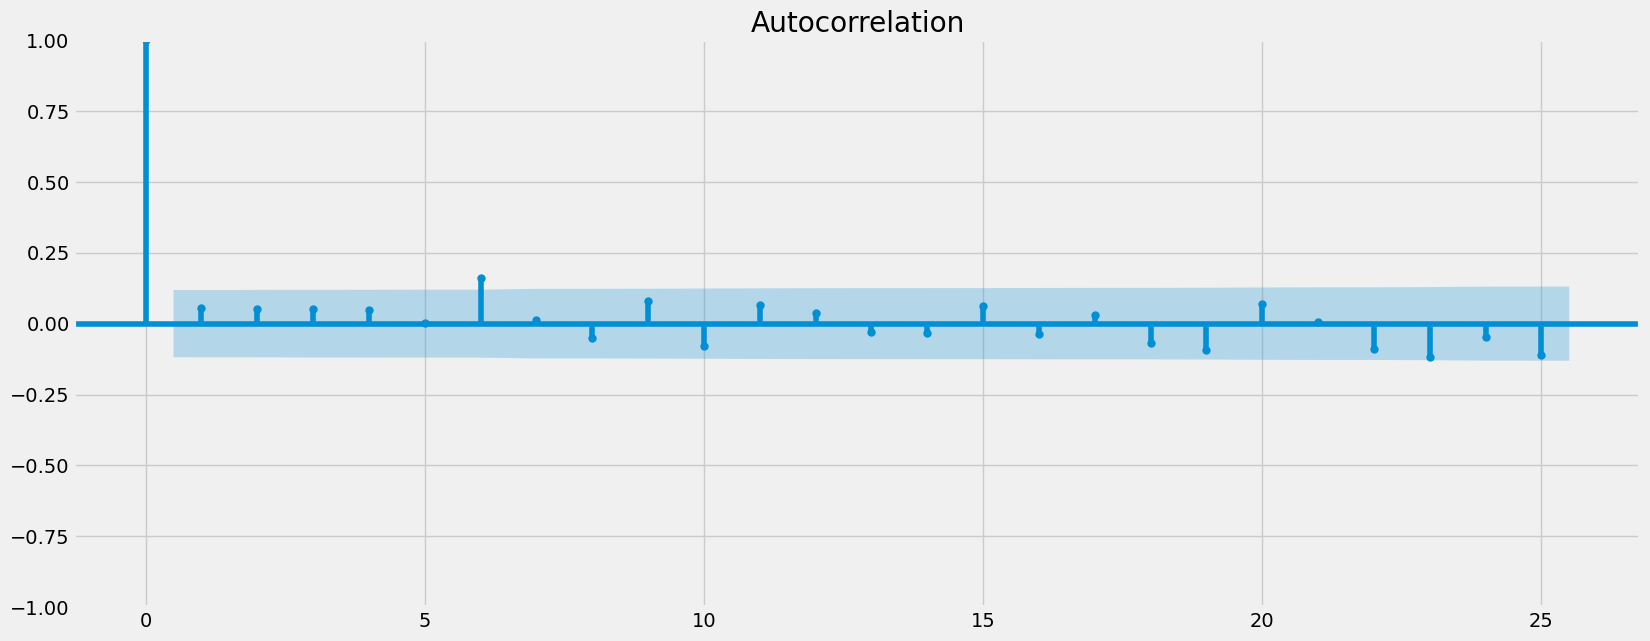

In [26]:
#Checking out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(sub)
plt.show()

There are only two lines that go above the blue confidence area so the data is stationary but not perfectly stationary.